In [102]:
import sys,importlib
sys.path.append('../')
import simulation
from numpy import *
from sympy import *
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline
init_printing()

In [103]:
Variables=symbols("x1 y1 z1 x2 y2 z2")
x1,y1,z1,x2,y2,z2 = Variables
Time=symbols("t")
t=Time
Parameters = symbols("alpha beta gamma delta w a0 a1 omega")
alpha,beta,gamma,delta,w,a0,a1,omega = Parameters

### Rossler System

In [104]:
F=Matrix([-y1-z1, x1+alpha*y1, beta + z1*(x1-gamma),
          -y2-z2, x2+alpha*y2, beta + z2*(x2-gamma),])
F

⎡    -y₁ - z₁    ⎤
⎢                ⎥
⎢   α⋅y₁ + x₁    ⎥
⎢                ⎥
⎢β + z₁⋅(-γ + x₁)⎥
⎢                ⎥
⎢    -y₂ - z₂    ⎥
⎢                ⎥
⎢   α⋅y₂ + x₂    ⎥
⎢                ⎥
⎣β + z₂⋅(-γ + x₂)⎦

In [105]:
zeta=Matrix([0,0,0,
             0,0,0])

zeta

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

### Synchrony

In [106]:
phi=Matrix([(x2-x1-(a0 + a1*sin(w*t))), y2-y1, z2-z1])
phi

⎡-a₀ - a₁⋅sin(t⋅w) - x₁ + x₂⎤
⎢                           ⎥
⎢         -y₁ + y₂          ⎥
⎢                           ⎥
⎣         -z₁ + z₂          ⎦

In [107]:
N=simulation.VectorDivergence(phi,Variables)
N

⎡-1  0   0   1  0  0⎤
⎢                   ⎥
⎢0   -1  0   0  1  0⎥
⎢                   ⎥
⎣0   0   -1  0  0  1⎦

In [108]:
on_manifold = [(x2,x1+(a0 + a1*sin(w*t))),(y2,y1),(z2,z1)]


### Invariance

In [109]:
NF=N*(F+zeta)
NF

⎡     y₁ - y₂ + z₁ - z₂      ⎤
⎢                            ⎥
⎢   -α⋅y₁ + α⋅y₂ - x₁ + x₂   ⎥
⎢                            ⎥
⎣-z₁⋅(-γ + x₁) + z₂⋅(-γ + x₂)⎦

In [110]:
dPhi=diff(phi,Time)
dPhi

⎡-a₁⋅w⋅cos(t⋅w)⎤
⎢              ⎥
⎢      0       ⎥
⎢              ⎥
⎣      0       ⎦

In [111]:
eqn=(NF+dPhi)
simplify(eqn)

⎡-a₁⋅w⋅cos(t⋅w) + y₁ - y₂ + z₁ - z₂⎤
⎢                                  ⎥
⎢      -α⋅y₁ + α⋅y₂ - x₁ + x₂      ⎥
⎢                                  ⎥
⎣    z₁⋅(γ - x₁) - z₂⋅(γ - x₂)     ⎦

In [112]:
zeta[3]=-(eqn)[0]
zeta[4]=-(eqn)[1]
zeta[5]=-(eqn)[2]
simplify(zeta)

⎡                0                ⎤
⎢                                 ⎥
⎢                0                ⎥
⎢                                 ⎥
⎢                0                ⎥
⎢                                 ⎥
⎢a₁⋅w⋅cos(t⋅w) - y₁ + y₂ - z₁ + z₂⎥
⎢                                 ⎥
⎢      α⋅y₁ - α⋅y₂ + x₁ - x₂      ⎥
⎢                                 ⎥
⎣   -z₁⋅(γ - x₁) + z₂⋅(γ - x₂)    ⎦

In [113]:
zeta=zeta.subs(on_manifold)
#zeta = simplify(zeta)
zeta

⎡                      0                      ⎤
⎢                                             ⎥
⎢                      0                      ⎥
⎢                                             ⎥
⎢                      0                      ⎥
⎢                                             ⎥
⎢                a₁⋅w⋅cos(t⋅w)                ⎥
⎢                                             ⎥
⎢              -a₀ - a₁⋅sin(t⋅w)              ⎥
⎢                                             ⎥
⎣z₁⋅(-γ + x₁) - z₁⋅(a₀ + a₁⋅sin(t⋅w) - γ + x₁)⎦

In [114]:
NF=N*(F+zeta)
simplify(NF)
simplify(NF+dPhi).subs(on_manifold)

⎡                                0                                ⎤
⎢                                                                 ⎥
⎢                                0                                ⎥
⎢                                                                 ⎥
⎣-z₁⋅(-a₀ - a₁⋅sin(t⋅w) + γ - x₁) - z₁⋅(a₀ + a₁⋅sin(t⋅w) - γ + x₁)⎦

In [115]:
NZ=N*zeta
NZ

⎡                a₁⋅w⋅cos(t⋅w)                ⎤
⎢                                             ⎥
⎢              -a₀ - a₁⋅sin(t⋅w)              ⎥
⎢                                             ⎥
⎣z₁⋅(-γ + x₁) - z₁⋅(a₀ + a₁⋅sin(t⋅w) - γ + x₁)⎦

### Stability

In [116]:
# chi=Matrix([(x2-x1-(a0+a1*sin(w*t))),0,0,
#            0,-(y2-y1),-x2*(z2-z1)])
#            #-(x2-x1-(a0+a1*sin(w*t))),-(y2-y1),-x2*(z2-z1)])
chi=Matrix([0,0,0,
            #-(z2-z1),-(y2-y1),-x2*(z2-z1)])
            (z2-z1),-(y2-y1)+(x2-x1-(a0+a1*sin(w*t))),-x2*(z2-z1)])


chi

⎡                  0                  ⎤
⎢                                     ⎥
⎢                  0                  ⎥
⎢                                     ⎥
⎢                  0                  ⎥
⎢                                     ⎥
⎢              -z₁ + z₂               ⎥
⎢                                     ⎥
⎢-a₀ - a₁⋅sin(t⋅w) - x₁ + x₂ + y₁ - y₂⎥
⎢                                     ⎥
⎣           -x₂⋅(-z₁ + z₂)            ⎦

In [117]:
del_zeta=simulation.VectorDivergence(zeta,Variables)
del_zeta

⎡0  0          0          0  0  0⎤
⎢                                ⎥
⎢0  0          0          0  0  0⎥
⎢                                ⎥
⎢0  0          0          0  0  0⎥
⎢                                ⎥
⎢0  0          0          0  0  0⎥
⎢                                ⎥
⎢0  0          0          0  0  0⎥
⎢                                ⎥
⎣0  0  -a₀ - a₁⋅sin(t⋅w)  0  0  0⎦

In [118]:
del_chi=simulation.VectorDivergence(chi,Variables)
del_chi

⎡0   0  0      0     0    0 ⎤
⎢                           ⎥
⎢0   0  0      0     0    0 ⎥
⎢                           ⎥
⎢0   0  0      0     0    0 ⎥
⎢                           ⎥
⎢0   0  -1     0     0    1 ⎥
⎢                           ⎥
⎢-1  1  0      1     -1   0 ⎥
⎢                           ⎥
⎣0   0  x₂  z₁ - z₂  0   -x₂⎦

In [119]:
del_F=simulation.VectorDivergence(F,Variables)
del_F

⎡0   -1    -1     0   0      0   ⎤
⎢                                ⎥
⎢1   α      0     0   0      0   ⎥
⎢                                ⎥
⎢z₁  0   -γ + x₁  0   0      0   ⎥
⎢                                ⎥
⎢0   0      0     0   -1    -1   ⎥
⎢                                ⎥
⎢0   0      0     1   α      0   ⎥
⎢                                ⎥
⎣0   0      0     z₂  0   -γ + x₂⎦

In [120]:
(del_F+del_zeta+del_chi)

⎡0   -1            -1            0     0    0 ⎤
⎢                                             ⎥
⎢1   α             0             0     0    0 ⎥
⎢                                             ⎥
⎢z₁  0          -γ + x₁          0     0    0 ⎥
⎢                                             ⎥
⎢0   0             -1            0    -1    0 ⎥
⎢                                             ⎥
⎢-1  1             0             2   α - 1  0 ⎥
⎢                                             ⎥
⎣0   0   -a₀ - a₁⋅sin(t⋅w) + x₂  z₁    0    -γ⎦

In [121]:
N*(del_F+del_zeta+del_chi)

⎡ 0     1                   0                 0    -1    0 ⎤
⎢                                                          ⎥
⎢-2   1 - α                 0                 2   α - 1  0 ⎥
⎢                                                          ⎥
⎣-z₁    0    -a₀ - a₁⋅sin(t⋅w) + γ - x₁ + x₂  z₁    0    -γ⎦

In [122]:
diff(N,t)*N.transpose()

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [127]:
Jac = N*(del_F+del_zeta+del_chi)*N.transpose() + diff(N,t)*N.transpose()
Jac = simplify(Jac)
Jac=Jac.subs(on_manifold)
Jac

⎡ 0      -2      0  ⎤
⎢                   ⎥
⎢ 4    2⋅α - 2   0  ⎥
⎢                   ⎥
⎣2⋅z₁     0     -2⋅γ⎦

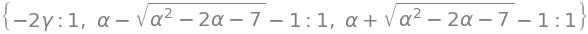

In [128]:
Jac.eigenvals()

In [129]:
J=Matrix([[0,-2,0,],
          [ 4, -1.8, 0],
           [2*z1,0,-28] ])
J

⎡ 0     -2    0 ⎤
⎢               ⎥
⎢ 4    -1.8   0 ⎥
⎢               ⎥
⎣2⋅z₁   0    -28⎦

In [130]:
simplify(J.eigenvals())

### Coupling

In [ ]:
chi

In [ ]:
zeta

In [ ]:
simplify((chi+zeta))